# Single Minima Potential Field Gradient Based Path Planner for Dynamical Environments

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gradplanner.planner.field_utils import Pixel, combine_grad_fields
from gradplanner.planner.utils import plot_grad_field
from gradplanner.planner.repulsive_field import get_repulsive_field
from gradplanner.planner.attractor_field import get_attractor_field

In [2]:
%load_ext autoreload
%autoreload 2

## Conventions
* The occupancy map has 1s at the boundaries. We assume that the robot is not allowed to leave the map, since there it would not be able to navigate anyways. (SLAM is not working there)
* The robot position is denoted by -2
* The goal is denoted by -1
* Obstacles are denoted by 1
* Originally free space is denoted by 0

## 0: Defining an occupancy grid:

In [3]:
# Defining an occupancy grid:
scale = 2
M = 32 * scale
N = 32 * scale
R = 8  * scale
goal_position = np.array([25 * scale, 6 * scale]) 

# creating the boarder:
occupancy_grid = np.ones((M, N))
occupancy_grid[1: -1, 1: -1] = np.zeros((M - 2, N - 2))

# obstacles:
occupancy_grid[4 * scale: 9 * scale, 10 * scale: 16 * scale] = 1
occupancy_grid[15 * scale: 20 * scale, 9 * scale: 13 * scale] = 1
# u-shaped obstacle:
occupancy_grid[16 * scale: 26 * scale, 20 * scale: 22 * scale] = 1
occupancy_grid[16 * scale: 18 * scale, 21 * scale: 26 * scale] = 1
occupancy_grid[24 * scale: 26 * scale, 21 * scale: 26 * scale] = 1
occupancy_grid[18 * scale: 20 * scale, 25 * scale: 26 * scale] = 1
occupancy_grid[22 * scale: 24 * scale, 25 * scale: 26 * scale] = 1

# just another occ grid with the goal for plotting:
occ_grid_to_plot = occupancy_grid.copy()
occ_grid_to_plot[goal_position[0], goal_position[1]] = -1

## 1: The repulsive gradient field:

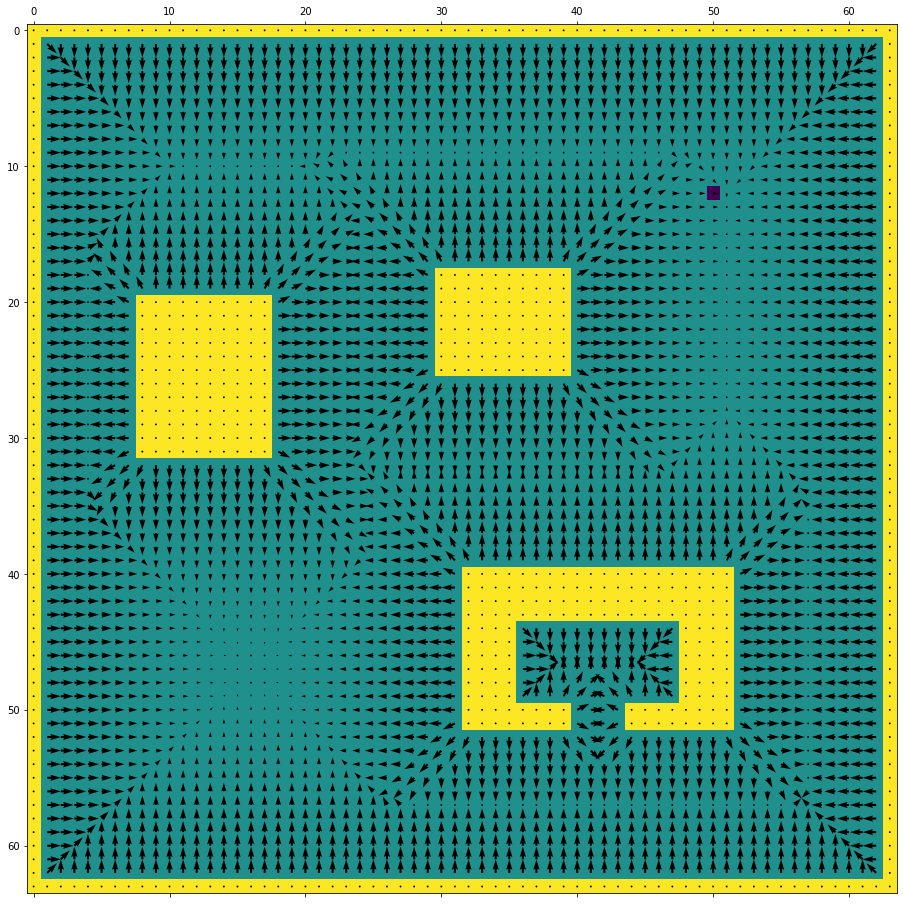

In [4]:
# Calculating and plotting the repulsive gradient field:
rep_field = get_repulsive_field(occupancy_grid, R)
plot_grad_field(rep_field, occ_grid_to_plot)

## 2: Attractor field:

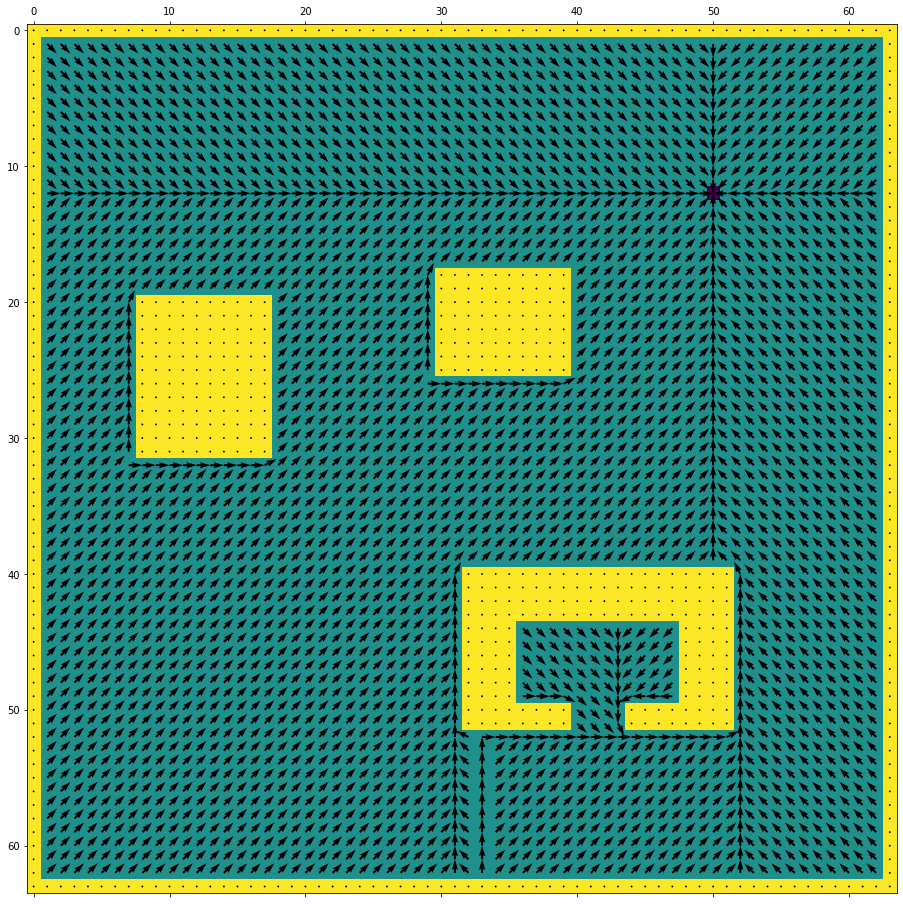

In [5]:
# calculating and plotting the attractor gradient field:
attractor_field = get_attractor_field(occupancy_grid, goal_position)
plot_grad_field(attractor_field, occ_grid_to_plot)

## Combining the two gradient fields:

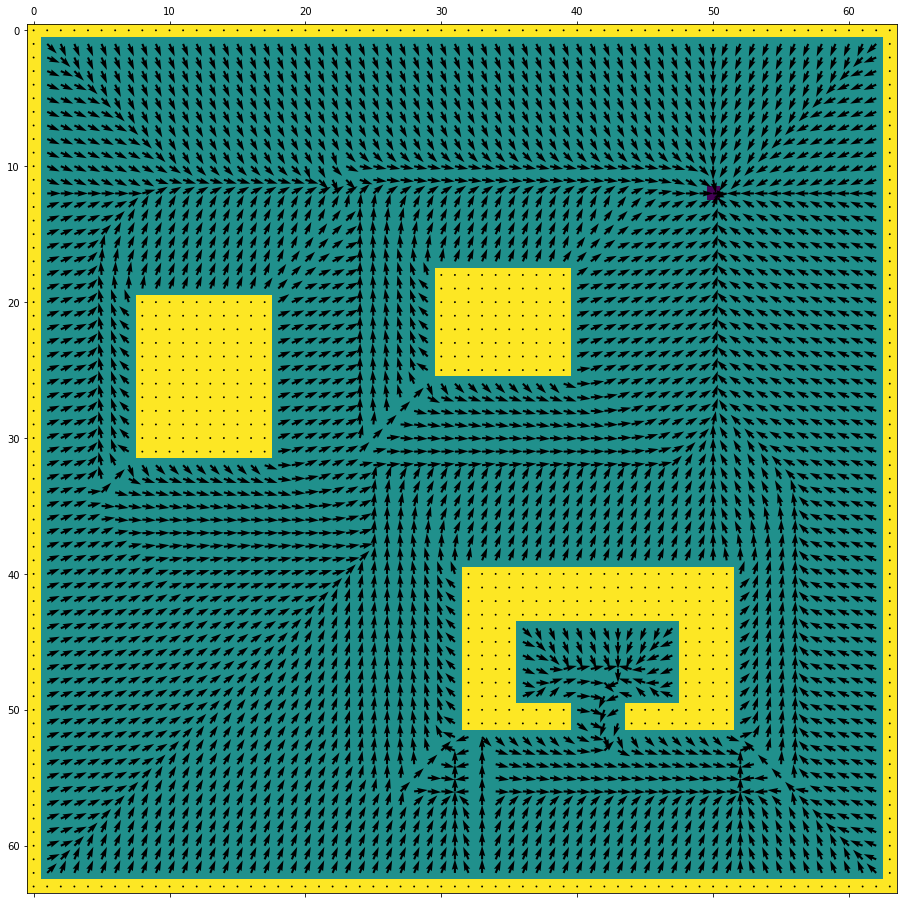

In [6]:
# combining and plotting the total gradient field:
total_grad_field = combine_grad_fields(rep_field, attractor_field)
plot_grad_field(total_grad_field, occ_grid_to_plot)